In [1]:
# Author: Chang Wang
# zID : z5196324
# finished by 03/04/2020

import cv2
import os
import numpy as np
import sys
from PIL import Image
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.utils import shuffle
from sklearn import svm
from sklearn import preprocessing

In [2]:
def read_files(train_dir, test_dir):
    train_pos = []
    for root, dirs, files in os.walk(train_dir):
        for name in dirs:
            if 'pos' in name:
                new_path = os.path.join(train_dir, name)
                for n_root, n_dirs, n_files in os.walk(new_path):
                    for director in n_dirs:
                        new_path_rank1 = os.path.join(new_path, director)
                        for img_root, img_dirs, image in os.walk(new_path_rank1):
                            for img in image:
                                train_pos.append(os.path.join(new_path_rank1, img))
    train_neg = []
    for root, dirs, files in os.walk(train_dir):
        for name in dirs:
            if 'neg' in name:
                new_path = os.path.join(train_dir, name)
                for n_root, n_dirs, n_files in os.walk(new_path):
                    for director in n_dirs:
                        new_path_rank1 = os.path.join(new_path, director)
                        for img_root, img_dirs, image in os.walk(new_path_rank1):
                            for img in image:
                                train_neg.append(os.path.join(new_path_rank1, img))
    
    test_pos = []
    for root, dirs, files in os.walk(test_dir):
        for name in dirs:
            if 'pos' in name:
                new_path = os.path.join(test_dir, name)
                for n_root, n_dirs, n_files in os.walk(new_path):
                    for director in n_dirs:
                        new_path_rank1 = os.path.join(new_path, director)
                        for img_root, img_dirs, image in os.walk(new_path_rank1):
                            for img in image:
                                test_pos.append(os.path.join(new_path_rank1, img))
    
    test_neg = []
    for root, dirs, files in os.walk(test_dir):
        for name in dirs:
            if 'neg' in name:
                new_path = os.path.join(test_dir, name)
                for n_root, n_dirs, n_files in os.walk(new_path):
                    for director in n_dirs:
                        new_path_rank1 = os.path.join(new_path, director)
                        for img_root, img_dirs, image in os.walk(new_path_rank1):
                            for img in image:
                                test_neg.append(os.path.join(new_path_rank1, img))
    return train_pos, train_neg, test_pos, test_neg

In [3]:
train_dir = 'Individual_Component/train'
test_dir = 'Individual_Component/test'
train_pos, train_neg, test_pos, test_neg = read_files(train_dir, test_dir)
print(len(train_pos))
print(len(train_neg))
print(len(test_pos))
print(len(test_neg))

22114
50000
3457
6000


In [4]:
def get_hog(pos, neg):
    feature_list = []
    pos_neg = []
    for files in pos:
        img = cv2.imread(files)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        features = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L2", transform_sqrt=True, feature_vector=True)
        feature_list.append(features)
        pos_neg.append(1)
    
    for files in neg:
        img = cv2.imread(files)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
        features = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L2", transform_sqrt=True, feature_vector=True)
        feature_list.append(features)
        pos_neg.append(0)

    return feature_list, pos_neg

In [5]:
train_x, train_y = get_hog(train_pos, train_neg)
train_x = np.array(train_x)
train_y = np.array(train_y)

In [6]:
print(len(train_x))

72114


In [7]:
print(train_x)

[[3.22147723e-01 8.71202667e-03 1.10169074e-01 ... 2.51670329e-02
  1.35086628e-02 6.94822921e-03]
 [3.54135468e-01 1.23184946e-01 1.17035690e-02 ... 8.16481914e-04
  6.21814092e-04 0.00000000e+00]
 [2.92106717e-01 1.71136667e-01 3.73075729e-02 ... 1.83252630e-02
  2.69235980e-02 4.27801786e-02]
 ...
 [2.16169298e-01 2.09038914e-01 3.16005033e-01 ... 2.57505099e-02
  2.05535501e-02 2.53031143e-02]
 [6.88368577e-01 8.80473284e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.54226611e-01 7.15026502e-02 5.57593946e-02 ... 0.00000000e+00
  3.60551262e-02 0.00000000e+00]]


In [8]:
test_x, test_y = get_hog(test_pos, test_neg)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [10]:
print(len(test_x))

9457


In [12]:
print(test_x)

[[0.00412331 0.00277296 0.00337456 ... 0.00372139 0.00497285 0.0124601 ]
 [0.27336737 0.02613731 0.01265112 ... 0.00335531 0.00231895 0.00314291]
 [0.52275843 0.         0.         ... 0.22912844 0.2279215  0.        ]
 ...
 [0.08909749 0.0008518  0.         ... 0.03488042 0.02084902 0.00284079]
 [0.11874946 0.119612   0.06663214 ... 0.12215104 0.13868503 0.11443041]
 [0.15213638 0.05227432 0.16471779 ... 0.         0.         0.        ]]


In [13]:
clf_svm = svm.LinearSVC(C=0.01, max_iter=1000, class_weight='balanced', verbose=1)
clf_svm.fit(train_x, train_y)

[LibLinear]

LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=1)

In [14]:
predict_result = clf_svm.predict(test_x)

In [15]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [16]:
print(recall_score(test_y, predict_result))

0.9846687879664449


In [17]:
print(precision_score(test_y, predict_result))

0.9773184036749928


In [18]:
print(f1_score(test_y, predict_result))

0.9809798270893372


In [19]:
print(accuracy_score(test_y, predict_result))

0.9860420852278735


In [20]:
test_path = 'Individual_Component/train/train_positive_A/00000000/item_00000000.pnm'

In [21]:
img = cv2.imread(test_path)

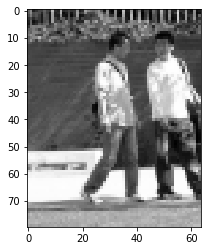

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,'gray')

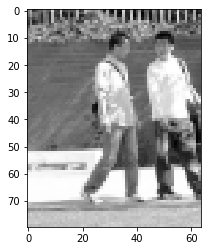

In [23]:
gamma_gray = np.sqrt(gray/float(np.max(gray)))
plt.imshow(gamma_gray, 'gray')

(80, 64) (80, 64)


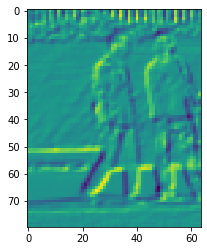

In [24]:
gradient_values_x = cv2.Sobel(gamma_gray, cv2.CV_64F, 1, 0, ksize=3)
gradient_values_y = cv2.Sobel(gamma_gray, cv2.CV_64F, 0, 1)
gradient_magnitude = cv2.addWeighted(gradient_values_x, 0.5, gradient_values_y, 0.5, 0)
plt.imshow(gradient_magnitude)
gradient_angle = cv2.phase(gradient_values_x, gradient_values_y, angleInDegrees=True)
print(gradient_magnitude.shape, gradient_angle.shape)

In [25]:
height, width = gray.shape
cell_size = 8
bin_size = 8
angle_unit = 360 / bin_size
gradient_magnitude = abs(gradient_magnitude)
cell_gradient_vector = np.zeros((int(height / cell_size), int(width / cell_size), bin_size))

def cell_gradient(cell_magnitude, cell_angle):
    orientation_centers = [0] * bin_size
    for k in range(cell_magnitude.shape[0]):
        for l in range(cell_magnitude.shape[1]):
            gradient_strength = cell_magnitude[k][l]
            gradient_angle = cell_angle[k][l]
            min_angle = int(gradient_angle / angle_unit)%8
            max_angle = (min_angle + 1) % bin_size
            mod = gradient_angle % angle_unit
            orientation_centers[min_angle] += (gradient_strength * (1 - (mod / angle_unit)))
            orientation_centers[max_angle] += (gradient_strength * (mod / angle_unit))
    return orientation_centers


for i in range(cell_gradient_vector.shape[0]):
    for j in range(cell_gradient_vector.shape[1]):
        cell_magnitude = gradient_magnitude[i * cell_size:(i + 1) * cell_size,
                         j * cell_size:(j + 1) * cell_size]
        cell_angle = gradient_angle[i * cell_size:(i + 1) * cell_size,
                     j * cell_size:(j + 1) * cell_size]
        cell_gradient_vector[i][j] = cell_gradient(cell_magnitude, cell_angle)

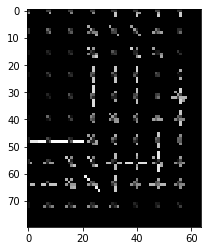

In [26]:
import math
hog_image= np.zeros([height, width])
cell_gradient = cell_gradient_vector
cell_width = cell_size / 2
max_mag = np.array(cell_gradient).max()
for x in range(cell_gradient.shape[0]):
    for y in range(cell_gradient.shape[1]):
        cell_grad = cell_gradient[x][y]
        cell_grad /= max_mag
        angle = 0
        angle_gap = angle_unit
        for magnitude in cell_grad:
            angle_radian = math.radians(angle)
            x1 = int(x * cell_size + magnitude * cell_width * math.cos(angle_radian))
            y1 = int(y * cell_size + magnitude * cell_width * math.sin(angle_radian))
            x2 = int(x * cell_size - magnitude * cell_width * math.cos(angle_radian))
            y2 = int(y * cell_size - magnitude * cell_width * math.sin(angle_radian))
            cv2.line(hog_image, (y1, x1), (y2, x2), int(255 * math.sqrt(magnitude)))
            angle += angle_gap

plt.imshow(hog_image, cmap=plt.cm.gray)
plt.show()

In [27]:
hog_vector = []
for i in range(cell_gradient_vector.shape[0] - 1):
    for j in range(cell_gradient_vector.shape[1] - 1):
        block_vector = []
        block_vector.extend(cell_gradient_vector[i][j])
        block_vector.extend(cell_gradient_vector[i][j + 1])
        block_vector.extend(cell_gradient_vector[i + 1][j])
        block_vector.extend(cell_gradient_vector[i + 1][j + 1])
        mag = lambda vector: math.sqrt(sum(i ** 2 for i in vector))
        magnitude = mag(block_vector)
        if magnitude != 0:
            normalize = lambda block_vector, magnitude: [element / magnitude for element in block_vector]
            block_vector = normalize(block_vector, magnitude)
        hog_vector.append(block_vector)

print(np.array(hog_vector).shape)

(63, 32)
